#**Name: Akash Badhautiya**


###**Roll Number: 24AI60R43**

**TASK - 1:** Load the UCI zoo dataset from https://archive.ics.uci.edu/dataset/111/zoo  <font color='red'>[MARK - 1]</font>

In [84]:
df=pd.read_csv("https://archive.ics.uci.edu/static/public/111/data.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(df)


    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [85]:
print(X.head())
print(y.head(10))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0        1         1         1         0     0     4     0         0        1  
1        1         1         1         0     0     4     1         0        1  
2        1         1         0         0     1     0     1         0        0  
3        1         1         1         0     0     4     0         0        1  
4        1         1         1         0     0     4     1         0        1  
0    1
1    1
2    4
3    1
4    1
5    1
6    1
7    4
8    4
9    1
Name:

In [ ]:
# Code here

**TASK - 2:** Check the dataset for missing or duplicate values and handle them appropriately.    <font color='red'>[MARK - 1]</font>

In [86]:
# Check for missing values
print(X.isnull().sum())

# Check for duplicate rows
duplicate_rows = X[X.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

#droping first column
X.drop(X.columns[0], axis=1, inplace=True)


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]
Index: []


In [ ]:
# Code here

**TASK - 3:** Show the class distribution of the dataset. (Use BAR Plot.)    <font color='red'>[MARK - 1]</font>

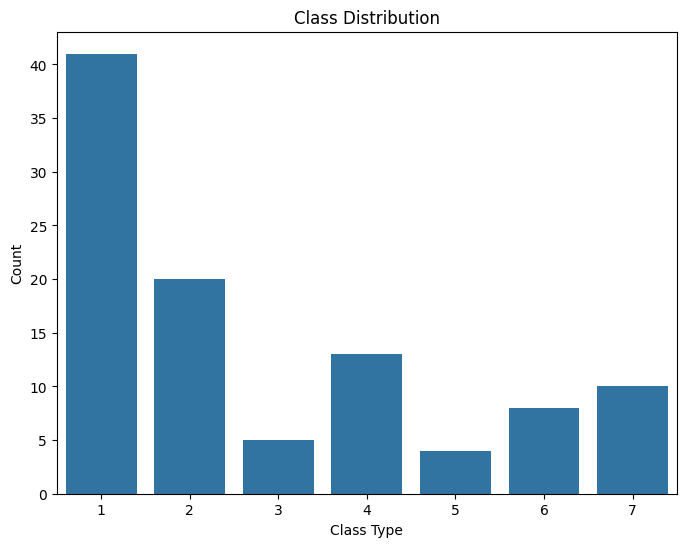

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

column_name = y.name
if isinstance(y, pd.DataFrame):
    column_name = y.columns[0]
else:
    column_name = y.name

#Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Code here

**TASK - 4:** Split the data into training and test sets (80%-20%).      <font color='red'>[MARK - 1]</font>

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shape of X: (101, 16)
Shape of y: (101,)
X_train shape: (80, 16)
X_test shape: (21, 16)
y_train shape: (80,)
y_test shape: (21,)


In [ ]:
# Code here

**TASK - 5:** Implement Adaboost classifier from scratch for binary classification using decision tree stumps as the base estimator (use scikit-learn's DecisionTreeClassifier). Use an appropriate value of the number of base estimators.   <font color='red'>[MARK - 5]</font>

In [89]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.estimators = []
        self.estimator_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.full(n_samples, (1 / n_samples))

        for _ in range(self.n_estimators):
            estimator = DecisionTreeClassifier(max_depth=1)
            estimator.fit(X, y, sample_weight=weights)
            predictions = estimator.predict(X)

            error = np.sum(weights[predictions != y])

            # Handle zero error to prevent division by zero and inf values
            if error == 0:
                estimator_weight = 1  # Assign a large weight if error is 0
            else:
                estimator_weight = 0.5 * np.log((1 - error) / error)

            weights *= np.exp(-estimator_weight * y * predictions)
            weights /= np.sum(weights)

            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        for estimator, estimator_weight in zip(self.estimators, self.estimator_weights):
            predictions += estimator_weight * estimator.predict(X)
        return np.sign(predictions)

In [ ]:
# Code here

**TASK - 6:** Train 7 Adaboost classifiers for the 7 classes for the one vs. all classification technique using the binary adaboost classifier you implemented from scratch. For each classifier, handle the labels appropriately. For example, for the first classifier, all samples belonging to class 1 will have label y=+1, and all other samples will have label y = -1. Similarly, for the second classifier, all samples belonging to “class 2” will have label +1, and samples belonging to all other classes would be assigned label –1. Perform prediction on the test set using the 7 classifiers. You can take the class corresponding to the maximum of the weighted sums returned by the 7 classifiers as the predicted class  <font color='red'>[MARK - 4]</font>

In [90]:

# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.to_numpy().ravel()
y_test_np = y_test.to_numpy().ravel()

classifiers = []
for i in range(1, 8):
    y_train_modified = np.where(y_train_np == i, 1, -1)
    classifier = AdaBoostClassifier(n_estimators=50)
    classifier.fit(X_train, y_train_modified)
    classifiers.append(classifier)

predictions = []
for classifier in classifiers:
    predictions.append(classifier.predict(X_test))

# Convert predictions to a NumPy array
predictions = np.array(predictions)

# Calculate weighted sums for each class
weighted_sums = np.zeros((len(classifiers), X_test.shape[0])) # Initialize weighted_sums with correct shape
for i, classifier in enumerate(classifiers):
    weighted_sums[i] = np.sum(classifier.predict(X_test) * np.array(classifier.estimator_weights)[:, np.newaxis], axis=0)

# Predicted class is the class with the highest weighted sum
predicted_classes = np.argmax(weighted_sums, axis=0) + 1

print(predicted_classes)


[1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 3]


In [ ]:
# Code here

**TASK - 7:** Compute the classification metrics – accuracy, precision recall.   <font color='red'>[MARK - 3]</font>

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report

precision=precision_score(y_test_np, predicted_classes, average='macro')
recall=recall_score(y_test_np, predicted_classes, average='macro')
accuracy=accuracy_score(y_test_np, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print("--------------------------------------------------------------")
print(classification_report(y_test_np, predicted_classes))
print("--------------------------------------------------------------")



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
--------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

--------------------------------------------------------------


In [ ]:
# Code here

**TASK - 8:** Perform classification using scikit-learn’s adaboost classifer and the OneVsRest() method: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html  <font color='red'>[MARK - 2]</font>

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

ada_boost_classifier=AdaBoostClassifier(n_estimators=50)
one_vs_rest_classifier=OneVsRestClassifier(ada_boost_classifier)
one_vs_rest_classifier.fit(X_train, y_train_np)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

OneVsRestClassifier(estimator=AdaBoostClassifier())

In [93]:
y_pred=one_vs_rest_classifier.predict(X_test)

one_vs_rest_accuracy=accuracy_score(y_test_np, y_pred)
one_vs_rest_precision=precision_score(y_test_np, y_pred, average='macro')
one_vs_rest_recall=recall_score(y_test_np, y_pred, average='macro')

print(f"One vs Rest Accuracy: {one_vs_rest_accuracy}")
print(f"One vs Rest Precision: {one_vs_rest_precision}")
print(f"One vs Rest Recall: {one_vs_rest_recall}")

print("--------------------------------------------------------------")
print(classification_report(y_test_np, y_pred))
print("--------------------------------------------------------------")

One vs Rest Accuracy: 0.9523809523809523
One vs Rest Precision: 0.75
One vs Rest Recall: 0.8333333333333334
--------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21

--------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# Code here

**TASK - 9:** Compute the performance obtained with scikit-learn's implementation and compare with your from-scratch implementation.   <font color='red'>[MARK - 2]</font>

In [94]:
#Performance from Scratch
print("\nPerformance by Scratch Implementation:")
print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

#Performance from Sklearn
print("\nPerformance by Sklearn Implementation:")
print(f"\nOne vs Rest Accuracy: {one_vs_rest_accuracy}")
print(f"One vs Rest Precision: {one_vs_rest_precision}")
print(f"One vs Rest Recall: {one_vs_rest_recall}")


Performance by Scratch Implementation:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Performance by Sklearn Implementation:

One vs Rest Accuracy: 0.9523809523809523
One vs Rest Precision: 0.75
One vs Rest Recall: 0.8333333333333334
